#                                 Introduction to Programming - Group 6

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas_profiling
import numpy as np
import seaborn as sns
import statistics
import random
#from sklearn import datasets 
from sklearn import linear_model
from sklearn import metrics 
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='J760S', api_key='yvOhqpYJWhMID7FiBzk2')
import warnings
warnings.simplefilter(action="ignore", category = "Futurewarning")

First = pd.read_csv("flights.csv")
holiday = pd.read_csv("Holidays.csv")
carriers = pd.read_csv("carriers.csv")

- The group decided immediately to put the Correct number of each carrier in the Dataframe!

In [3]:
# Rows that don't have nulls
carriers_clear = carriers[carriers['Code'].notnull()]


# NOTA: nan_rows = carriers[carriers['Code'].isnull()] >>>> rows that have null

In [4]:
from collections import defaultdict
lel ={}
listacodes = carriers_clear["Code"].tolist()
listadescrp = carriers_clear["Description"].tolist()

for k,v in zip(listacodes, listadescrp):
    lel.setdefault(k, []).append(v)

    
# Aqui estão as keys = code e values = description
#dict_lel

In [5]:
# Criar uma nova coluna para depois por a Description
First["Description"] = First["OP_UNIQUE_CARRIER"]

In [6]:
list_carriers = First["OP_UNIQUE_CARRIER"].tolist()

lfck =[]

for code in list_carriers:   
    
    xr = str(lel[code])
    
    lfck.append(xr)
    

df = First.assign(Description2=lfck)
df["Description2"] = df['Description2'].str.strip('[]')
First["Description"] = df["Description2"]

#Alterar a posição da coluna para a coluna a aseguir ao OP_UNIQUE_CARRIER
cols = First.columns.tolist()
column_to_move = "Description"
new_position = 5
cols.insert(new_position, cols.pop(cols.index(column_to_move)))

flight= First[cols]
    
    


# Part 1 - Loading flights Data 
---
### Question 1:  
- Number of rows loaded and what is the number of rows that contain unfilled (null) attributes.

In [7]:
flight = flight.drop(["Unnamed: 23"], 1)

In [8]:
print("Total Number of Rows =", flight.shape[0])
print("Total Number of Rows with null Attributes =", sum(flight.apply(lambda x: sum(x.isnull().values), axis = 1)>0))

Total Number of Rows = 570118
Total Number of Rows with null Attributes = 19096



###  Answer 1:  
- The File "flights.csv" has 570118 rows, and has 19096 rows with null attributes. If we considered the column "Unnamed: 23", the number of total values that contains and not contains null values is equal, the reasoning behind this fact, it's because the Column "Unnamed: 23" has, exactly, 570118 rows with Null values, meaning that it has only Null values. 
---         
### Question 2:  
- Selecting the columns that the group consider dispensable by removing them.

In [9]:
pandas_profiling.ProfileReport(flight)

Number of variables,24
Number of observations,570118
Total Missing (%),0.3%
Total size in memory,104.4 MiB
Average record size in memory,192.0 B
Numeric,8
Categorical,7
Boolean,2
Date,0
Text (Unique),0
Rejected,7


In [10]:
null_columns = flight.columns[flight.isnull().any()]
flight[null_columns].isnull().sum().to_frame().rename(columns={0:"Number of Null Values"})

,Number of Null Values
TAIL_NUM,1969
DEP_TIME,16823
DEP_DELAY,17323
ARR_TIME,17535
ARR_DELAY,18620
ACTUAL_ELAPSED_TIME,18418
AIR_TIME,18418


In [11]:
flight = flight.drop(["TAIL_NUM", "OP_CARRIER_FL_NUM", "ACTUAL_ELAPSED_TIME"],1)

In [12]:
flightz = flight[["ARR_TIME", "DEP_DELAY", "ARR_DELAY", "AIR_TIME"]].fillna(flight.median())

In [60]:
flight["ARR_TIME"] = flightz["ARR_TIME"]
flight["DEP_DELAY"] = flightz["DEP_DELAY"]
flight["ARR_DELAY"] = flightz["ARR_DELAY"]
flight["AIR_TIME"] = flightz["AIR_TIME"]
flight_actualized = flight.dropna()

In [61]:
#proof that there aren't any NUll values.
null_columns = flight_actualized.columns[flight.isnull().any()]
flight_actualized[null_columns].isnull().sum().to_frame().rename(columns={0:"Number of Null Values"})

,Number of Null Values
DEP_TIME,0


In [15]:
#After all this changes, calcule the number of rows:
print("Total Number of Rows =", flight_actualized.shape[0])
print("Total Number of Rows with null Attributes =", sum(flight_actualized.apply(lambda x: sum(x.isnull().values), axis = 1)>0))

Total Number of Rows = 553295
Total Number of Rows with null Attributes = 0



###  Answer 2:  
- From the Overview in Pandas Profiling Report and in the number of Null values in the columns, we concluded that we should remove: TAIL_NUM, OP_CARRIER_FL_NUM and ACTUAL_ELAPSED_TIME. Regarding the null values, we filled the columns ARR_TIME, DEP_DELAY, ARR_DELAY and AIR_TIME with the median, however relatively to DEP_TIME, since the units were different, we decided to remove the rows that had null attributes.

# Part 2 - US air transportation sector 
---
### Question 1:  
- Plot the number of flights per day

In [16]:
Flights_daily = flight_actualized.groupby("DAY_OF_MONTH").size().to_frame().reset_index().rename(columns={0:"Number of Flights"})

### Answer 1:  
- The plot has in the X-Axis the day of the Month and in the Y-Axis the Number of Flights. The plot is the following:

In [17]:
data = [go.Bar(
            x=Flights_daily["DAY_OF_MONTH"],
            y=Flights_daily["Number of Flights"],
            marker=dict(
                color='rgb(114,160,193)',
                line=dict(
                    color='rgb(0,26,0)',
                    width=1.5),
            ),
            opacity=0.6,
        )]

layout = go.Layout(
    autosize=False,
    width=1000,
    height=500,
    title ='Number of Flights per day',
    xaxis = dict(title = "Day of Month", mirror='ticks', titlefont = dict(
            color='#7f7f7f', size = 15), showline=True, linecolor='#000', zeroline=True, linewidth=2),
    yaxis = dict(
        range = [13000, 20500], mirror='ticks', title = "Number of Flights",
        titlefont = dict(color='#7f7f7f', size = 15), showline=True, linecolor='#000', zeroline=True, linewidth=2)
)

fig = go.Figure(data, layout)
py.iplot(fig, filename='color-bar')




#py.iplot(data, filename='bar-direct-labels')

In [18]:
meanFLIGHTS = Flights_daily["Number of Flights"]
print("The average of flights in this month was:", meanFLIGHTS.mean())

The average of flights in this month was: 17848.225806451614


### Question 2:  
- How many airlines are there? How many flights does each have? Is there a significant variation in the number of flights from week to week per company?

In [19]:
Unique_Carriers= flight_actualized["OP_UNIQUE_CARRIER"].unique()
print("There are", len(Unique_Carriers),"unique carriers.")

There are 18 unique carriers.


In [20]:
Flights_carriers = flight_actualized.groupby("Description").size().to_frame().reset_index().rename(columns={0:"Number of Flights"})
Flights_carriers.sort_values(by="Number of Flights", ascending = False)

,Description,Number of Flights
14,'Southwest Airlines Co.',107240
2,'American Airlines Inc.',72157
3,'Delta Air Lines Inc.',69754
13,'SkyWest Airlines Inc.',60714
16,'United Air Lines Inc.',44494
12,'Republic Airline',23845
9,'JetBlue Airways',23420
5,'Envoy Air',21670
11,'PSA Airlines Inc.',20687
6,'ExpressJet Airlines Inc.',19175


In [21]:
AIRLines_list = Flights_carriers["Description"].tolist()

data = []

dic = {}


for Airline in AIRLines_list:
    Airlinez = flight_actualized.loc[flight_actualized['Description'] == Airline]
    Day_intervals = Airlinez.groupby([pd.cut(Airlinez["DAY_OF_MONTH"], bins=list(range(0,36,7)))]).count()
    Airline_restricted = Day_intervals["DAY_OF_MONTH"].to_frame()

    Weeks = ["1º Week", "2º Week", "3º Week", "4º Week", "5º Week"]
    Airline_restricted.insert(1, "Weeks", Weeks)

    Airline_Weeks = Airline_restricted.set_index('Weeks').rename(columns={"DAY_OF_MONTH": "Number of Flights"})
    
    #we need a list to the the Dictionary
    my_list = Airline_Weeks["Number of Flights"].tolist()
    
    #Regarding the Standard Deviation this is the scenario: 
    #print("\nThe standard Deviation relatively to the Number of Fights in the Airline", Airline, "is:", statistics.pstdev(my_list))
    
    x8 = ["Week 1º", "Week 2º", "Week 3º", "Week 4º"]

    dic[Airline] = my_list
    

for i in dic.keys():

    trace_i = go.Scatter(x = Weeks, y = dic[i], mode = 'lines+markers', name = i)

    data.append(trace_i)

#data
layout = go.Layout(title ='Number of Flights per week')
fig = go.Figure(data, layout)
py.iplot(fig, filename='line-mode')



### Answer 2:  
- There are 18 unique Airlines in the file flights.csv. Regarding the number of Flights:


Airlines | Number of Flights
---------|------------------
 WN      | 109676
 AA      | 73598
 DL      | 71254
 OO      | 62194
 UA      | 45384
 YX      | 25212
 B6      | 24871
 MQ      | 22502
 OH      | 22210
 EV      | 20166
 9E      | 18234
 YV      | 16353
 AS      | 15312
 NK      | 14180
 F9      | 9707
 G4      | 6814
 HA      | 6627
 VX      | 5825


- Relatively to the variation in the number of flights from week to week per company, we analised the diferences based on the standard deviation. We concluded that the Airlines that had the most Number of flights were the ones that were subject to an higher variation per week. Therefore, the three companies that had the highest Standard deviation were: WN, AA and DL.

___
### Question 3:  
- Which airports have the most flights per day? And the ones with less? When choosing one of the largest airports, how does the number of flights per day vary? 

In [22]:
Flights_ORIGIN = flight_actualized.groupby("ORIGIN").size().to_frame().reset_index().rename(columns={0:"Number of Flights"})
ORIGIN_5 = Flights_ORIGIN.sort_values(by="Number of Flights", ascending = False).head(5)

#List with the 5 largest Airports.
ORIGIN_5LIST = ORIGIN_5["ORIGIN"].tolist()
ORIGIN_5

,ORIGIN,Number of Flights
18,ATL,29767
230,ORD,25135
86,DFW,21879
85,DEN,18040
175,LAX,17575


In [23]:
data =[]

for i in ORIGIN_5LIST:

    flightsQUERY = flight_actualized["ORIGIN"] == i 
    flight__actualized = flight_actualized[flightsQUERY]

    Flights_ORIGIN = flight__actualized.groupby("DAY_OF_MONTH").size().to_frame().reset_index().rename(columns={0:"Number of Flights"})

        
    trace_i = go.Bar(
        x=Flights_ORIGIN["DAY_OF_MONTH"],
        y=Flights_ORIGIN["Number of Flights"],
        name=i
    )

    data.append(trace_i) 
    
data
layout = go.Layout(title ='Number of Flights per day in the top 5 Airports', barmode='stack', xaxis = dict(title = "Day of Month", mirror='ticks', titlefont = dict(color='#7f7f7f', size = 15), linecolor='#000', zeroline=True, linewidth=2),
                   yaxis = dict(title = "Flights", mirror='ticks', titlefont = dict(color='#7f7f7f', size = 15), linecolor='#000', zeroline=True, linewidth=2))

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

In [25]:
for i in ORIGIN_5LIST:

    flightsQUERY = flight_actualized["ORIGIN"] == i 
    flight__actualized = flight_actualized[flightsQUERY]

    Flights_ORIGIN = flight__actualized.groupby("DAY_OF_MONTH").size().to_frame().reset_index().rename(columns={0:"Number of Flights"})

    Flights_ORIGIN
    print("The mean for", i ,"is", round(Flights_ORIGIN["Number of Flights"].mean(),0)) 

The mean for ATL is 960.0
The mean for ORD is 811.0
The mean for DFW is 706.0
The mean for DEN is 582.0
The mean for LAX is 567.0


In [26]:
Flights_ORIGIN = flight_actualized.groupby("ORIGIN").size().to_frame().reset_index().rename(columns={0:"Number of Flights"})
ORIGIN_5W = Flights_ORIGIN.sort_values(by="Number of Flights", ascending = False).tail(5)
ORIGIN_5W

,ORIGIN,Number of Flights
136,HGR,9
235,OWB,8
8,ADK,8
27,BFF,3
332,YNG,2


In [27]:
ORIGIN_5W = Flights_ORIGIN.sort_values(by="Number of Flights", ascending = False).tail(5)
ORIGIN_5W
ORIGIN_5LIST1 = ORIGIN_5W["ORIGIN"].tolist()
ORIGIN_5LIST1

['HGR', 'OWB', 'ADK', 'BFF', 'YNG']

In [28]:
data =[]

for i in ORIGIN_5LIST1:

    flightsQUERY = flight_actualized["ORIGIN"] == i 
    flight__actualized = flight_actualized[flightsQUERY]

    Flights_ORIGIN = flight__actualized.groupby("DAY_OF_MONTH").size().to_frame().reset_index().rename(columns={0:"Number of Flights"})

        
    trace_i = go.Bar(
        x=Flights_ORIGIN["DAY_OF_MONTH"],
        y=Flights_ORIGIN["Number of Flights"],
        name=i
    )

    data.append(trace_i) 
    
data
layout = go.Layout(title ='Number of Flights per day in the Worst 5 Airports', barmode='stack', xaxis = dict(title = "Day of Month", mirror='ticks', titlefont = dict(color='#7f7f7f', size = 15), linecolor='#000', zeroline=True, linewidth=2),
                   yaxis = dict(title = "Flights", mirror='ticks', titlefont = dict(color='#7f7f7f', size = 15), linecolor='#000', zeroline=True, linewidth=2))

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

In [29]:
#Number of flights per day per AIrline and its correspondent Growth.

# SET THE SETTINGS TO THE NUMBER OF FLIGHTS PER DAY
Flights_ORIGIN = flight_actualized.groupby("ORIGIN").size().to_frame().reset_index().rename(columns={0:"Number of Flights"})
ORIGIN_TOP5=Flights_ORIGIN.sort_values(by="Number of Flights", ascending = False).head(5)

#Doing a list to check later if the value that the user puts is in the list
ORIGIN_list = ORIGIN_TOP5["ORIGIN"].tolist()

while True:
        
    print("\n\t\t\t\tTOP 5 Largest Airports:", ORIGIN_list)
        
    xs= input("\n\t\t\t\t\tChose one of the TOP 5 largest Airports: \n\t\t\t\t\tAnswer: ")
    xw = xs.upper()
    
    if xw not in ORIGIN_list:
        print("\n\t\t\t\t\tPlease select a VALID Airport!")
    else:
        break

Airport_ = flight_actualized[flight_actualized["ORIGIN"] == xw]
Airp= Airport_.groupby("DAY_OF_MONTH").size().to_frame().reset_index().rename(columns={0:"Number of Flights"})


    # PLOT THE GRAPH OF NUMBER OF FLIGHTS PER DAY

trace0 = go.Scatter(
x = Airp["DAY_OF_MONTH"],
y = Airp["Number of Flights"],
name = 'lines+markers')

data = [trace0]
layout = go.Layout(title ='Number of Flights per day in %s' % xw, barmode='stack', xaxis = dict(title = "Day of Month", mirror='ticks', titlefont = dict(color='#7f7f7f', size = 15), linecolor='#000', zeroline=True, linewidth=2),
                   yaxis = dict(title = "Flights", mirror='ticks', titlefont = dict(color='#7f7f7f', size = 15), linecolor='#000', zeroline=True, linewidth=2))
    
fig = go.Figure(data=data, layout=layout)
display(py.iplot(fig, filename='some-bar'))

#Growth Rate

AIR_GROWTH = Airp.rename(columns={"Number of Flights":"Growth Rate"})
AIR_GROWTH_percentage = AIR_GROWTH["Growth Rate"].pct_change().to_frame().reset_index().rename(columns={"index":"DAY_OF_MONTH"})
AIR_GROWTH_percentage['Growth Rate'] = AIR_GROWTH_percentage['Growth Rate'].apply(lambda x: x*100)

trace0 = go.Scatter(
x = AIR_GROWTH_percentage["DAY_OF_MONTH"],
y = AIR_GROWTH_percentage["Growth Rate"],
name = 'lines+markers')

data = [trace0]
layout = go.Layout(title ='Growth Rate per day in %s' % xw, barmode='stack', xaxis = dict(title = "Day of Month", mirror='ticks', titlefont = dict(color='#7f7f7f', size = 15), linecolor='#000', zeroline=True, linewidth=2),
                   yaxis = dict(title = "Flights", mirror='ticks', titlefont = dict(color='#7f7f7f', size = 15), linecolor='#000', zeroline=True, linewidth=2))
    
fig = go.Figure(data=data, layout=layout)
display(py.iplot(fig, filename='some-bar'))
    
    
        


				TOP 5 Largest Airports: ['ATL', 'ORD', 'DFW', 'DEN', 'LAX']

					Chose one of the TOP 5 largest Airports: 
					Answer: atl


### Answer 3:  
- The airports that have the most flights per day are: ATL, ORD, DFW, CLT and DEN. 
- The airports that the least flights per day are: YNG, BFF, ADK, HGR and PPG.
- When chosing one airport, we can check their Number of flights per day, as well as the growth rate of the number of Flights per day. The input method allows the user to select one of the Top 5 largest airports and to analise the evolution of the Number of flights per airport per day!

---
### Question 4:  
-  Function that allows you to analyze existing connections from a specific airport

In [30]:
# 1º Function that gives information if the user is specific with the carrier.

def ComCarrier(origin, carrier):
    

        
    origin = origin.upper()
    carrier = carrier.upper()

    xe = flight_actualized["ORIGIN"] == origin
    y = flight_actualized[xe]
    as1 = y["OP_UNIQUE_CARRIER"] == carrier
    overview = y[as1]
    x33 = overview.groupby("DEST").count().reset_index()
    xrT = x33[["DEST", "YEAR"]].rename(columns={"YEAR":"Number of Flights"})
    xrT["ORIGIN"] =xrT["Number of Flights"]
    xrT["ORIGIN"] = origin

    cols = xrT.columns.tolist()
    column_to_move = "ORIGIN"
    new_position = 0
    cols.insert(new_position, cols.pop(cols.index(column_to_move)))
    flight0= xrT[cols]

        #<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

    xed = flight_actualized["DEST"] == origin
    y1 = flight_actualized[xed]
    as11 = y1["OP_UNIQUE_CARRIER"] == carrier
    overview = y1[as11]
    x33 = overview.groupby("ORIGIN").count().reset_index()
    xrT = x33[["ORIGIN", "YEAR"]].rename(columns={"YEAR":"Number of Flights"})
    xrT["DEST"] =xrT["Number of Flights"]
    xrT["DEST"] = origin

    cols = xrT.columns.tolist()
    column_to_move = "DEST"
    new_position = 1
    cols.insert(new_position, cols.pop(cols.index(column_to_move)))

    flight01= xrT[cols]
    
    #<<<<<<<<<<<<<<<<<<<<<<<<<<

    fig = plt.figure(figsize=(25,5))

    ax2 = fig.add_subplot(122)
    font_size=14
    bbox=[0, 0, 1, 3]
    ax2.axis('off')
    mpl_table = ax2.table(cellText = flight01.values, bbox=bbox, colLabels=flight01.columns, cellLoc='center')
    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(20)
    mpl_table._cells[(0,0 )].set_facecolor("whitesmoke")
    mpl_table._cells[(0, 1)].set_facecolor("whitesmoke")
    mpl_table._cells[(0, 2)].set_facecolor("whitesmoke")
        #Agora = plt.show(mpl_table)

    ax1 = fig.add_subplot(121)
    font_size=14
    bbox=[0, 0, 1, 3]
    ax1.axis('off')
    mpl_table = ax1.table(cellText = flight0.values, bbox=bbox, colLabels=flight0.columns, cellLoc='center')
    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(20)
    mpl_table._cells[(0, 0)].set_facecolor("whitesmoke")
    mpl_table._cells[(0, 2)].set_facecolor("whitesmoke")
    mpl_table._cells[(0, 1)].set_facecolor("whitesmoke")
    print("\n\tThe number of connections is: ", flight01.shape[0]+flight0.shape[0])

In [31]:
# 2º Function that gives information if the user is not specific with the carrier.

def SemCarrier(origin):
    

        
    origin = origin.upper()

    xe = flight_actualized["ORIGIN"] == origin
    y = flight_actualized[xe]
    x33 = y.groupby("DEST").count().reset_index()
    xrT = x33[["DEST", "YEAR"]].rename(columns={"YEAR":"Number of Flights"})
    xrT["ORIGIN"] =xrT["Number of Flights"]
    xrT["ORIGIN"] = origin

    cols = xrT.columns.tolist()
    column_to_move = "ORIGIN"
    new_position = 0
    cols.insert(new_position, cols.pop(cols.index(column_to_move)))
    flight0= xrT[cols]

        #<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

    xed = flight_actualized["DEST"] == origin
    y1 = flight_actualized[xed]
    x33 = y1.groupby("ORIGIN").count().reset_index()
    xrT = x33[["ORIGIN", "YEAR"]].rename(columns={"YEAR":"Number of Flights"})
    xrT["DEST"] =xrT["Number of Flights"]
    xrT["DEST"] = origin

    cols = xrT.columns.tolist()
    column_to_move = "DEST"
    new_position = 1
    cols.insert(new_position, cols.pop(cols.index(column_to_move)))

    flight01= xrT[cols]
    
    #<<<<<<<<<<<<<<<<<<<<<<<<<<

    fig = plt.figure(figsize=(25,5))

    ax2 = fig.add_subplot(122)
    font_size=14
    bbox=[0, 0, 1, 10]
    ax2.axis('off')
    mpl_table = ax2.table(cellText = flight01.values, bbox=bbox, colLabels=flight01.columns, cellLoc='center')
    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(20)
    mpl_table._cells[(0,0 )].set_facecolor("whitesmoke")
    mpl_table._cells[(0, 1)].set_facecolor("whitesmoke")
    mpl_table._cells[(0, 2)].set_facecolor("whitesmoke")
        #Agora = plt.show(mpl_table)

    ax1 = fig.add_subplot(121)
    font_size=14
    bbox=[0, 0, 1, 10]
    ax1.axis('off')
    mpl_table = ax1.table(cellText = flight0.values, bbox=bbox, colLabels=flight0.columns, cellLoc='center')
    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(20)
    mpl_table._cells[(0, 0)].set_facecolor("whitesmoke")
    mpl_table._cells[(0, 2)].set_facecolor("whitesmoke")
    mpl_table._cells[(0, 1)].set_facecolor("whitesmoke")
    
    print("\n\tThe number of connections is: ", flight01.shape[0]+flight0.shape[0])
    

Select a place to departe. Which Origin?    
	Answer: LAX

Do you want to specify which carrier you want to fly with? [Y/N]
	Answer: y
Which carrier bro? 
	Answer: UA

	The number of connections is:  42


None

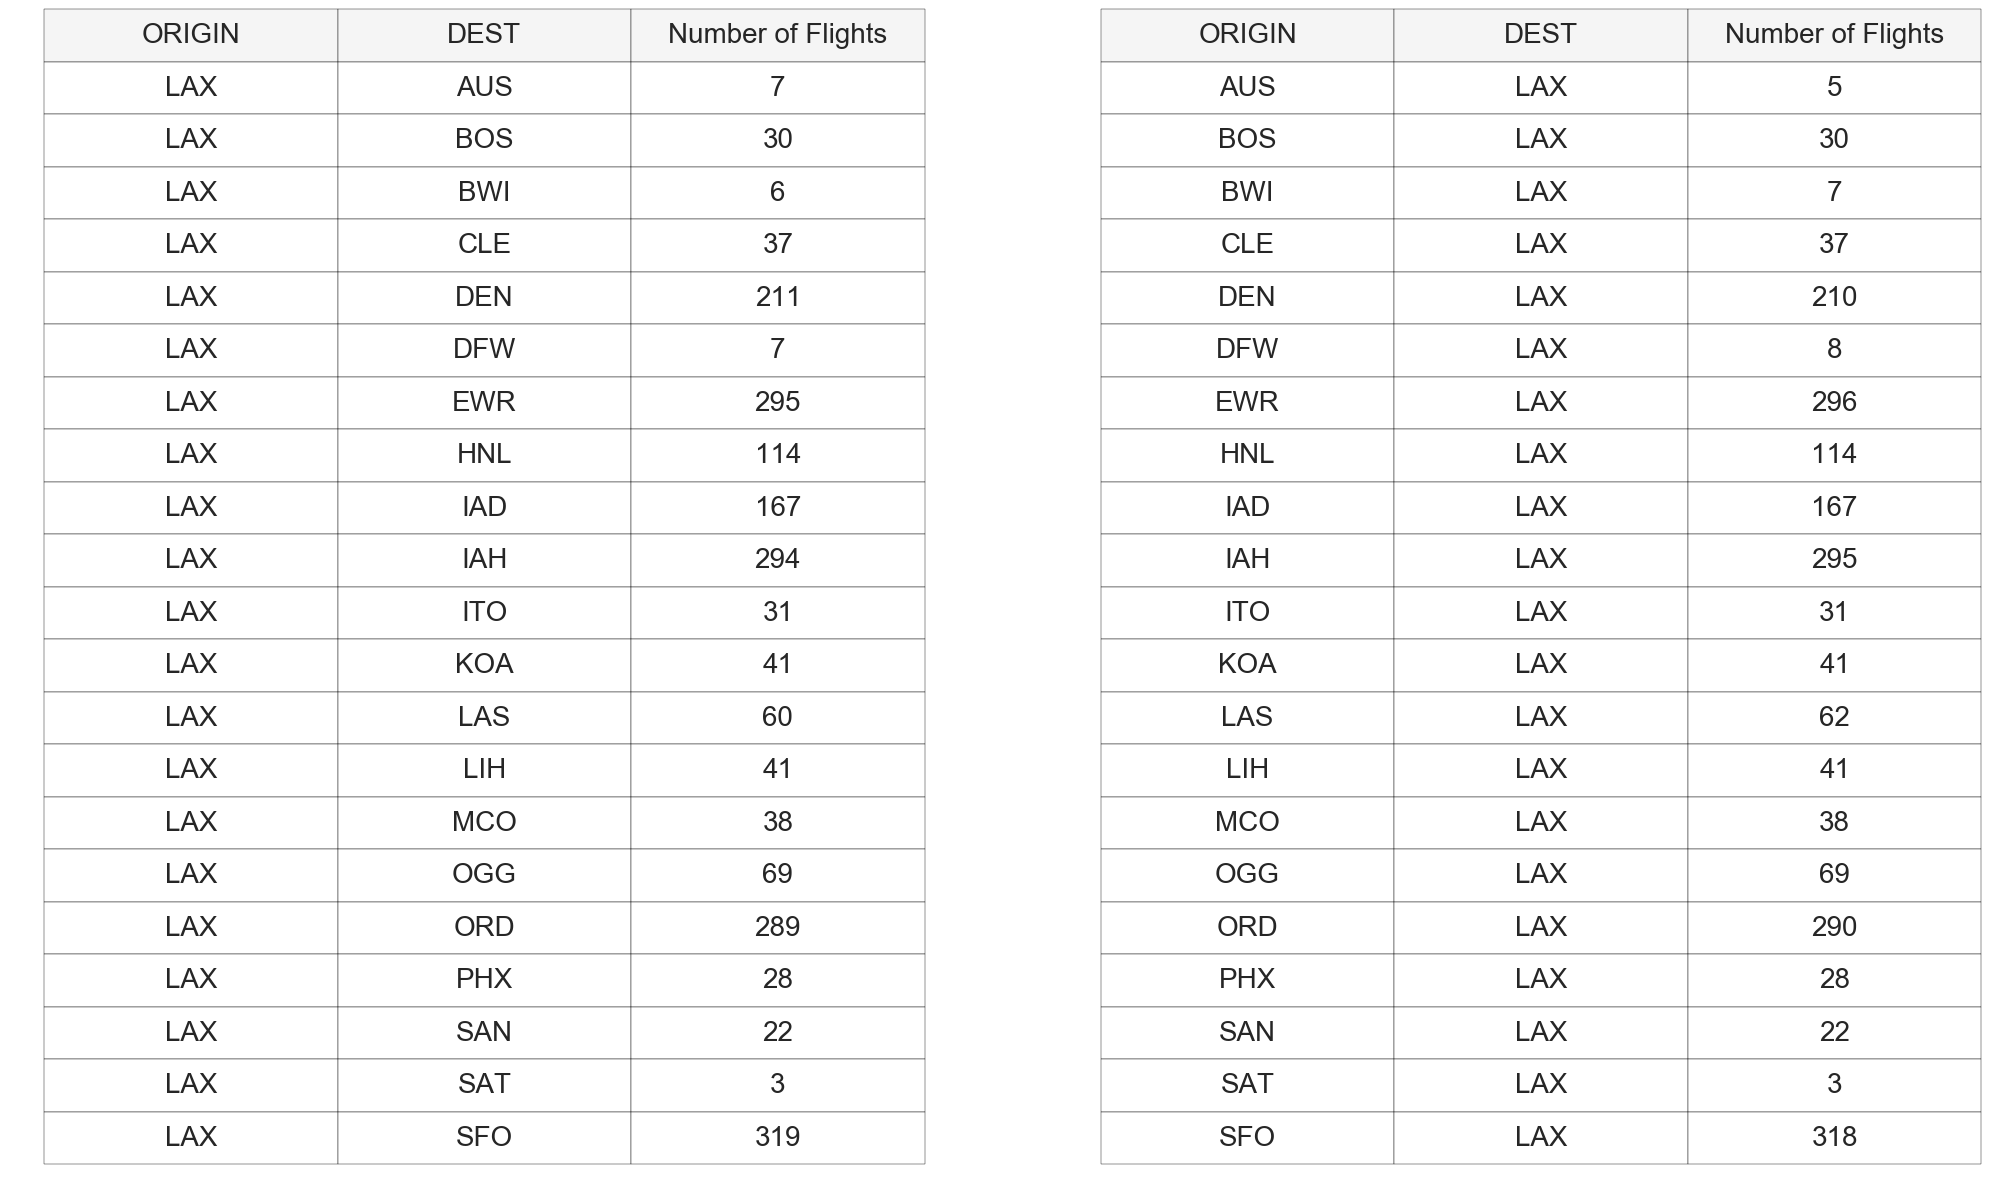

In [33]:
origin = input("Select a place to departe. Which Origin?    \n\tAnswer: ")
origin = origin.upper()
xs = input("\nDo you want to specify which carrier you want to fly with? [Y/N]\n\tAnswer: ")
xs = xs.upper()
if xs == "Y":
    carrier = input("Which carrier bro? \n\tAnswer: ")
    carrier.upper()
    display(ComCarrier(origin, carrier))
    
if xs == "N":
    display(SemCarrier(origin))

### Question 5:  
- How many flights are there on average per hour? How does this value change (flights per hour) throughout the day? Is the number of flights influenced by the hour of the day? 

In [34]:

flight_departure = flight_actualized[["CRS_DEP_TIME", "DAY_OF_MONTH"]].reset_index().rename(columns={"CRS_DEP_TIME":
                                                                                                     "Departure Hour"})

flight_departureHOURLY = pd.to_datetime(flight_departure["Departure Hour"], unit='h').dt.strftime('%H:%M').reset_index()


flight_departure["Departure Hour"] = flight_departureHOURLY["Departure Hour"]


In [35]:

Lista_Days = list(range(1,32))


my_list =[]

for day in Lista_Days:

    
    query = flight_departure["DAY_OF_MONTH"] == day

    
    flightDep_Day1 = flight_departure[query]

    
    NumberFlights_HOUR = flightDep_Day1.groupby("Departure Hour").count()

    
    NumberFlights_HOUR = NumberFlights_HOUR.rename(columns={"index":"Number of Flights per Hour"}).drop(["DAY_OF_MONTH"],1)
    NumberFlights_HOUR_actualized = NumberFlights_HOUR.reset_index()
    
    
    HOURS_NUM = NumberFlights_HOUR_actualized["Number of Flights per Hour"].tolist()
    

    for numbers in HOURS_NUM:    
        my_list.append(numbers)
    my_list
my_list



print("The average number of flights per hour is:", round(np.mean(my_list),0))

The average number of flights per hour is: 744.0


In [36]:

Lista_Days = list(range(1,32))


my_list =[]


while True:      
        
        
    day = int(input("\n\t\t\tChose one day to see the Number of Flights per Hour Evolution: \n\t\t\t\t\tAnswer: "))
    
    if day not in Lista_Days:
        print("\n\t\t\t\t\tPlease select a VALID Day!")
    else:
        break

#     
            
day = float(day)
    

query = flight_departure["DAY_OF_MONTH"] == day

            
flightDep_Day1 = flight_departure[query]


NumberFlights_HOUR = flightDep_Day1.groupby("Departure Hour").count()
    

NumberFlights_HOUR = NumberFlights_HOUR.rename(columns={"index":"Number of Flights per Hour"}).drop(["DAY_OF_MONTH"],1)
NumberFlights_HOUR_actualized = NumberFlights_HOUR.reset_index()

# PLOT THE GRAPH OF NUMBER OF FLIGHTS PER DAY PER HOUR

trace0 = go.Scatter(
x = NumberFlights_HOUR_actualized["Departure Hour"],
y = NumberFlights_HOUR_actualized["Number of Flights per Hour"],
name = 'lines+markers')

data = [trace0]
layout = go.Layout(title ='Number of flights in day %s' % int(day), barmode='stack', xaxis = dict(title = "Departure Hour", mirror='ticks', titlefont = dict(color='#7f7f7f', size = 15), linecolor='#000', zeroline=True, linewidth=2),
                   yaxis = dict(title = "Flights", mirror='ticks', titlefont = dict(color='#7f7f7f', size = 15), linecolor='#000', zeroline=True, linewidth=2))
    
fig = go.Figure(data=data, layout=layout)
display(py.iplot(fig, filename='some-bar'))
    
# SET THE SETTINGS TO THE GROWTH RATE

AIR_GROWTH = NumberFlights_HOUR_actualized.rename(columns={"Number of Flights per Hour":"Growth Rate"})
AIR_GROWTH_percentage = AIR_GROWTH["Growth Rate"].pct_change().to_frame().reset_index().rename(columns={"index":"DAY_OF_MONTH"})
AIR_GROWTH_percentage['Growth Rate'] = AIR_GROWTH_percentage['Growth Rate'].apply(lambda x: x*100)

# PLOT THE GRAPH OF GROWTH RATE

trace0 = go.Scatter(
x = AIR_GROWTH_percentage["DAY_OF_MONTH"],
y = AIR_GROWTH_percentage["Growth Rate"],
name = 'lines+markers')

data = [trace0]
layout = go.Layout(title ='Growth Rate in day %s' % int(day), barmode='stack', xaxis = dict(title = "Day of Month", mirror='ticks', titlefont = dict(color='#7f7f7f', size = 15), linecolor='#000', zeroline=True, linewidth=2),
                   yaxis = dict(title = "Flights", mirror='ticks', titlefont = dict(color='#7f7f7f', size = 15), linecolor='#000', zeroline=True, linewidth=2))
    
fig = go.Figure(data=data, layout=layout)
display(py.iplot(fig, filename='some-bar'))


			Chose one day to see the Number of Flights per Hour Evolution: 
					Answer: 5


###### Answer 5:  
- The average number of flights per hour is: 766.0. The method to reach it was, simply, get all values of the number of Flights per hour according the to the day, and then the average of these values.
- Regarding to the code that allowed to represent graphically the number of flights per Hour according to the day, we concluded that most flights are, either, at 00:00h or at 04:00h. So answering the second part of this question, the Number of flights decreases drastically in the other hours. For example, in Day 1: the lowest number of flights ocurred at 13:00h with 650 flights, and the highest value of flights ocurred at 00:00 with 1018 flights.
- We can conclude that the number of flights is clearly influenced by the Hour of the day!

---
### Question 6:  
- Considering the previous analysis, does this distribution vary according to the day of the week?

In [37]:
#Getting only the Columns CRS_DEP_TIME and DAY_OF_WEEK
flight_departure_weekly = flight_actualized[["CRS_DEP_TIME", "DAY_OF_WEEK"]].reset_index().rename(columns={"CRS_DEP_TIME":"Departure Hour"})
   
#To Hours.
flight_departure_weekly_HOURLY = pd.to_datetime(flight_departure_weekly["Departure Hour"], unit='h').dt.strftime('%H:%M').reset_index()

#New COlumn.
flight_departure_weekly["Departure Hour"] = flight_departure_weekly_HOURLY["Departure Hour"]

In [38]:
#lista dos dias
Lista_Days_of_Week = list(range(1,8))


while True:      

        
    day_week = int(input("\n\t\tChose one day of the Week to see the Number of Flights per Hour Evolution: \n\t\t\tAnswer: "))
    
    if day_week not in Lista_Days_of_Week:
        print("\n\t\t\tPlease select a VALID Day of the Week!")
    else:
        break

#O truque estava aqui LOOOOOL      
            
day_week = float(day_week)
    
#Fazer um query consoante o dia
query = flight_departure_weekly["DAY_OF_WEEK"] == day_week

#Obter um novo dataframe de acordo com o query.            
flight_departure_weekly_subjecttoDAYWEEK = flight_departure_weekly[query]

#Agrupar consoante as horas e contar.
DAYWEEK_Count = flight_departure_weekly_subjecttoDAYWEEK.groupby("Departure Hour").count()
    
#Mudar o nome da coluna
DAYWEEK_1 = DAYWEEK_Count.rename(columns={"index":"Number of Flights per Hour"}).drop(["DAY_OF_WEEK"],1)
DAYWEEK_1_actualized = DAYWEEK_1.reset_index()

# PLOT THE GRAPH OF NUMBER OF FLIGHTS PER DAY PER HOUR

trace0 = go.Scatter(
x = DAYWEEK_1_actualized["Departure Hour"],
y = DAYWEEK_1_actualized["Number of Flights per Hour"],
name = 'lines+markers')

data = [trace0]
layout = go.Layout(title ='Number of flights in day %s of the week' % int(day_week), barmode='stack', xaxis = dict(title = "Departure Hour", mirror='ticks', titlefont = dict(color='#7f7f7f', size = 15), linecolor='#000', zeroline=True, linewidth=2),
                   yaxis = dict(title = "Flights", mirror='ticks', titlefont = dict(color='#7f7f7f', size = 15), linecolor='#000', zeroline=True, linewidth=2))
    
fig = go.Figure(data=data, layout=layout)
display(py.iplot(fig, filename='some-bar'))
        
# SET THE SETTINGS TO THE GROWTH RATE

WEEK_GROWTH = DAYWEEK_1_actualized.rename(columns={"Number of Flights per Hour":"Growth Rate"})
WEEK_GROWTH_percentage = WEEK_GROWTH["Growth Rate"].pct_change().to_frame().reset_index().rename(columns={"index":"Departure Hours"})
WEEK_GROWTH_percentage['Growth Rate'] = WEEK_GROWTH_percentage['Growth Rate'].apply(lambda x: x*100)

# PLOT THE GRAPH OF GROWTH RATE
    
trace0 = go.Scatter(
x = WEEK_GROWTH_percentage["Departure Hours"],
y = WEEK_GROWTH_percentage["Growth Rate"],
name = 'lines+markers')

data = [trace0]
layout = go.Layout(title ='Growth Rate in day %s of the week' % int(day_week), barmode='stack', xaxis = dict(title = "Day of Month", mirror='ticks', titlefont = dict(color='#7f7f7f', size = 15), linecolor='#000', zeroline=True, linewidth=2),
                   yaxis = dict(title = "Flights", mirror='ticks', titlefont = dict(color='#7f7f7f', size = 15), linecolor='#000', zeroline=True, linewidth=2))
    
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='some-bar')




		Chose one day of the Week to see the Number of Flights per Hour Evolution: 
			Answer: 4


---
### Question 7:  
- What is the average duration of a flight? 

In [40]:
#7.1
flight_actualized['AIR_TIME'].mean()

111.53928736026893

In [41]:
#7.2
flight_AIRTIME= flight_actualized.sort_values(by='AIR_TIME', ascending=True)
flight_AIRTIME.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,Description,ORIGIN,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,...,DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,AIR_TIME,DISTANCE
52403,2018,1,15,1,AS,'Alaska Airlines Inc.',WRG,"Wrangell, AK",PSG,"Petersburg, AK",...,1047.0,-19.0,1130,1115.0,-15.0,0.0,0.0,24.0,8.0,31.0
54391,2018,1,19,5,AS,'Alaska Airlines Inc.',PSG,"Petersburg, AK",WRG,"Wrangell, AK",...,1448.0,-26.0,1538,1508.0,-30.0,0.0,0.0,24.0,8.0,31.0
53893,2018,1,18,4,AS,'Alaska Airlines Inc.',WRG,"Wrangell, AK",PSG,"Petersburg, AK",...,1052.0,-14.0,1130,1110.0,-20.0,0.0,0.0,24.0,8.0,31.0
253830,2018,1,12,5,OO,'SkyWest Airlines Inc.',PLN,"Pellston, MI",APN,"Alpena, MI",...,1023.0,738.0,2257,1106.0,729.0,0.0,0.0,52.0,8.0,69.0
50447,2018,1,11,4,AS,'Alaska Airlines Inc.',WRG,"Wrangell, AK",PSG,"Petersburg, AK",...,1052.0,-14.0,1130,1113.0,-17.0,0.0,0.0,24.0,8.0,31.0


Flight length
- Short flight: Under 3 hours = 180 minutes
- Medium flight: 3 to 6 hours = 180 to 360 minutes
- Long flight: 6 to 12 hours = 360 to 720 minutes
- Ultra long flight: Over 12 hours = 720 minutes

In [42]:
Categories = ['Short flight', 'Medium flight', 'Long flight', 'Ultra long flight']

list_short_flight = []
list_medium_flight = []
list_long_flight = []
list_ultralong_flight = []

for time in flight_AIRTIME['AIR_TIME']:
    if time <= 180:
        list_short_flight.append(time)
    elif time > 180 and time <= 360:
        list_medium_flight.append(time)
    elif time > 360 and time <= 720:
        list_long_flight.append(time)
    else:
        list_ultralong_flight.append(time)
        
Number_of_short_flights = len(list_short_flight)
Number_of_medium_flights = len(list_medium_flight)
Number_of_long_flights = len(list_long_flight)
Number_of_ultralong_flights = len(list_ultralong_flight)
Total_number_of_flights = flight_actualized['AIR_TIME'].shape[0]

short = Number_of_short_flights / Total_number_of_flights
medium = Number_of_medium_flights / Total_number_of_flights
long = Number_of_long_flights / Total_number_of_flights
ultralong = Number_of_ultralong_flights / Total_number_of_flights

categories ={'Short flight': [short], 'Medium flight': [medium], 'Long flight': [long], 'Ultra long flight':[ultralong]}

for category in categories.keys():
    tipo = categories[category]
    tipo_perc = tipo*100
    tipo_perc_withoutBRACKETS = float(', '.join(map(str, tipo)))
    print("\n", category, "represents", round(tipo_perc_withoutBRACKETS, 2), "% of total Number of flights share.")


 Short flight represents 0.86 % of total Number of flights share.

 Medium flight represents 0.14 % of total Number of flights share.

 Long flight represents 0.0 % of total Number of flights share.

 Ultra long flight represents 0.0 % of total Number of flights share.


# Part 3 - Delays sector 
---
### Question 1: 

-  You should be able to get a view of the flights by doing the following separation: canceled flights; flights made with change of destination (diverted); flights to the correct destination. 

In [43]:

carrier_flights = flight_actualized['OP_UNIQUE_CARRIER'].groupby(flight_actualized['OP_UNIQUE_CARRIER']).count()
carrier_cancelled = flight_actualized['CANCELLED'].groupby(flight_actualized['OP_UNIQUE_CARRIER']).sum()
carrier_delayed = flight_actualized['OP_UNIQUE_CARRIER'].groupby(flight_actualized['OP_UNIQUE_CARRIER']).count()
carrier_diverted = flight_actualized['DIVERTED'].groupby(flight_actualized['OP_UNIQUE_CARRIER']).sum()
carrier_avg_time = flight_actualized['AIR_TIME'].groupby(flight_actualized['OP_UNIQUE_CARRIER']).mean()
carrier_avg_dist = flight_actualized['DISTANCE'].groupby(flight_actualized['OP_UNIQUE_CARRIER']).mean()
carrier_avg_delay = flight_actualized['ARR_DELAY'].groupby(flight_actualized['OP_UNIQUE_CARRIER']).mean()
carrier_pct_cancelled = 100*np.divide(carrier_cancelled, carrier_flights)

#carrier_names = pd.Series(["WN", "AA", "DL", "OO", "UA", "YX", "B6", "MQ", "OH", "EV", "9E", "YV", "AS", "NK", "F9", "G4", "HA", "VX"], index=carrier_flights.index)

carrier_names = pd.Series(AIRLines_list, index=carrier_flights.index)
summary_table_carrier = pd.concat([carrier_flights, carrier_cancelled, carrier_pct_cancelled, 
                                   carrier_diverted, 
                           carrier_avg_time, carrier_avg_dist, carrier_avg_delay], axis=1)

summary_table_carrier.columns = ['Total Flights', 'Cancelled Flights', 'Percent Cancelled',
                         'Diverted Flights', 'Average Flight Time (minutes)',
                         'Average Flight Distance (miles)', 'Average Flight Delay (minutes)']



x = summary_table_carrier.reset_index()

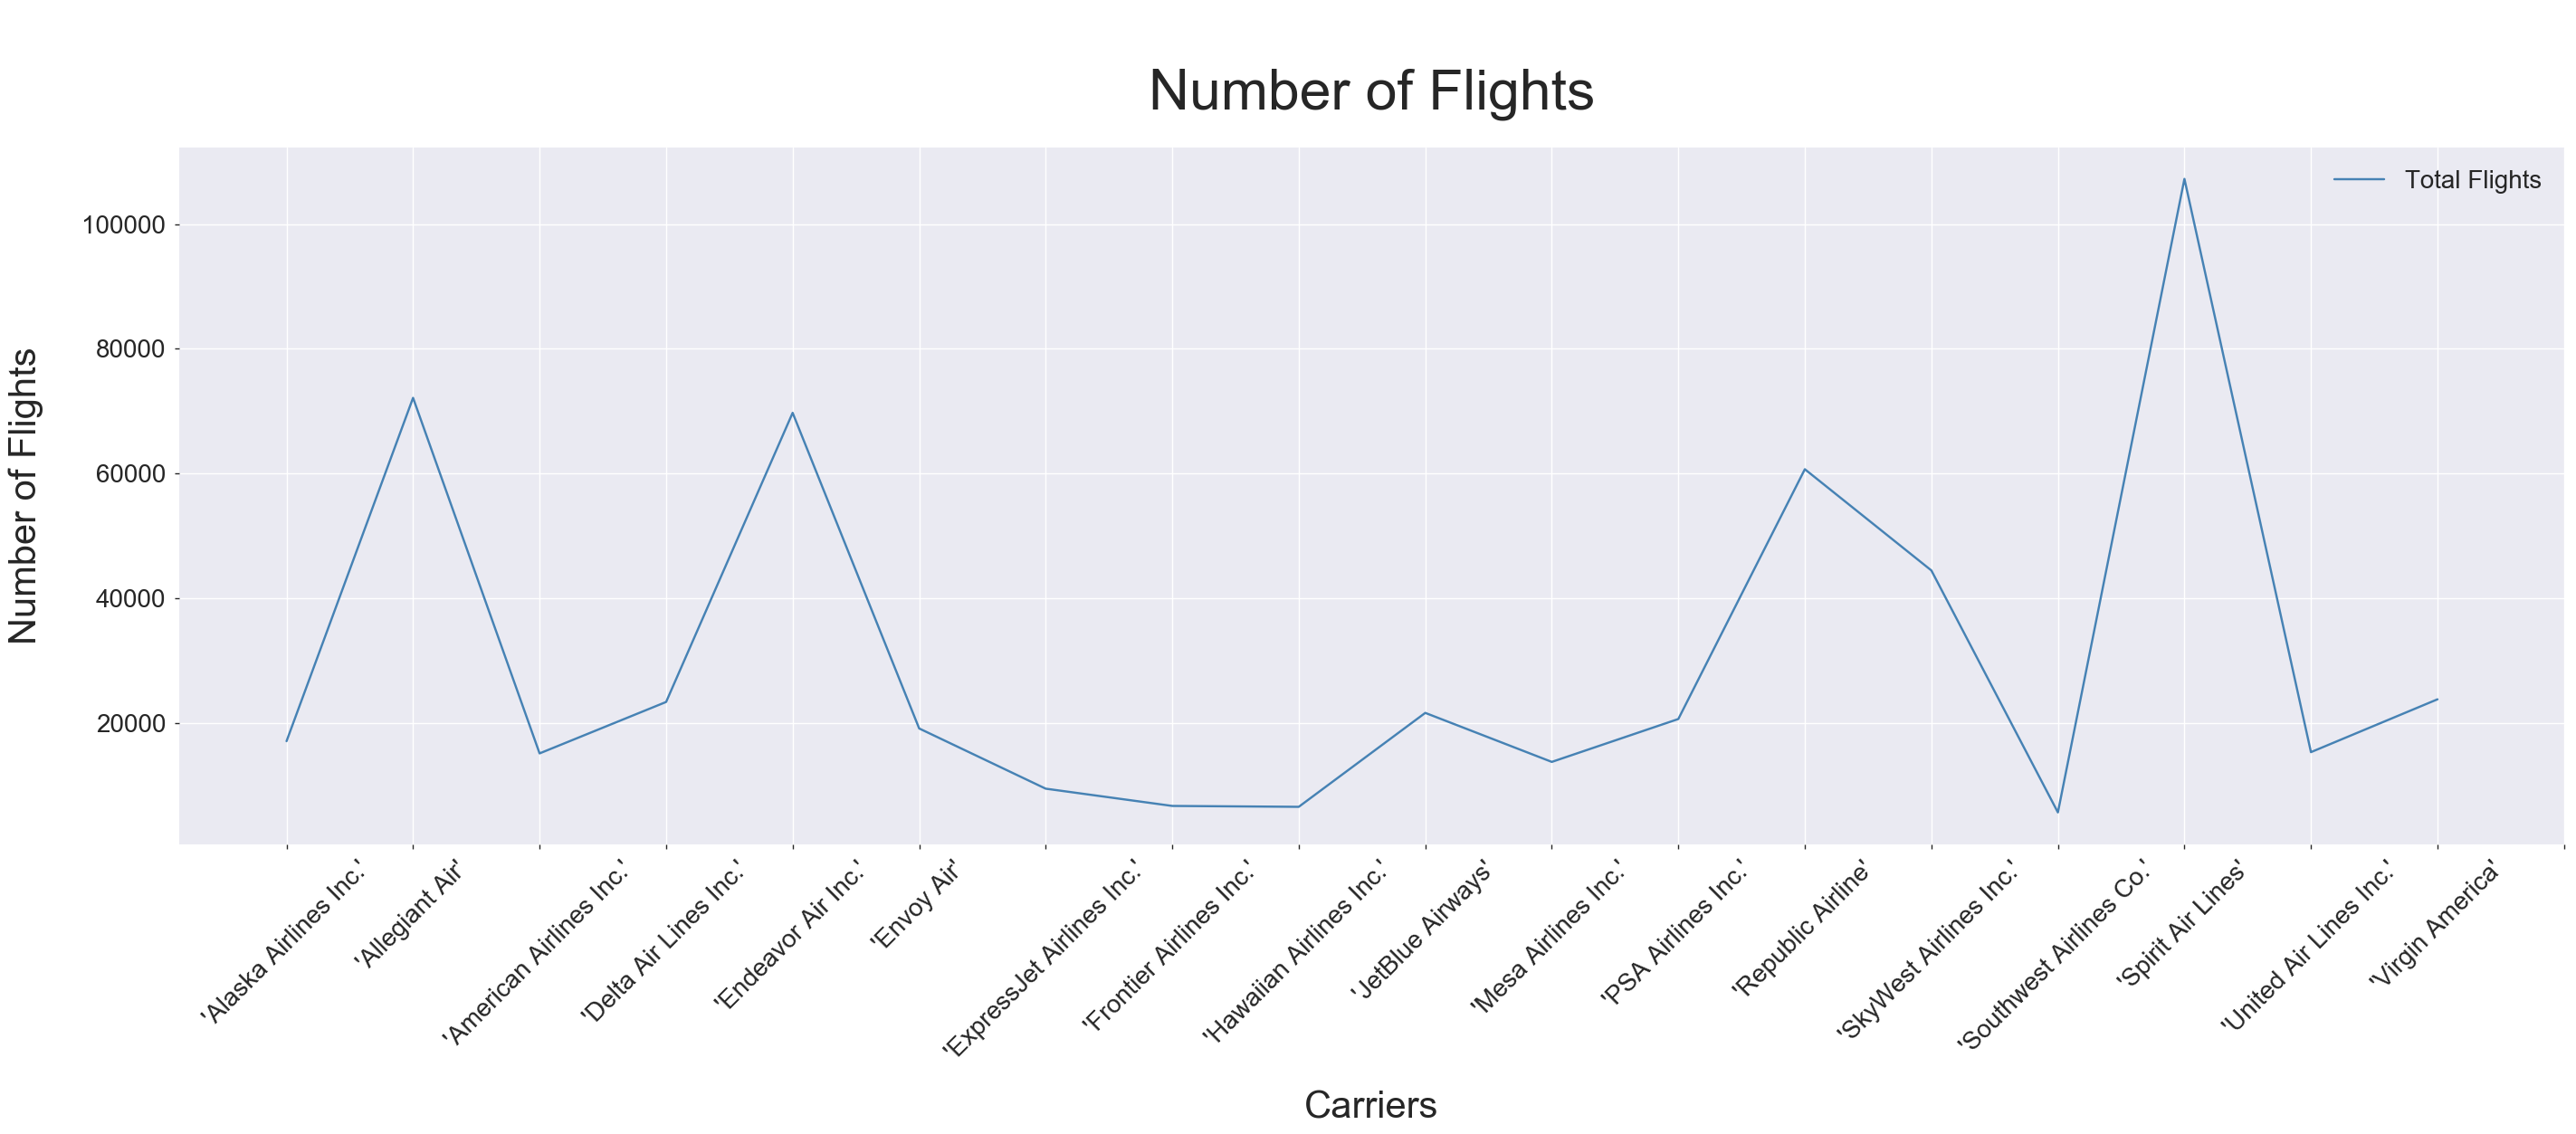

In [44]:
# PLOT THE GRAPH OF NUMBER OF FLIGHTS PER DAY PER HOUR

x.plot(linestyle='-', x ="OP_UNIQUE_CARRIER", y = "Total Flights", color = "steelblue", figsize=(34, 10), fontsize =20)
    
plt.title("\nNumber of Flights", fontsize =45, pad=30)
plt.xlabel('Carriers', fontsize =30, labelpad=20)
plt.ylabel('Number of Flights', fontsize =30, labelpad=30)
    
ticks_zLABEL = AIRLines_list

ticks_z = list(range(0,1+len(AIRLines_list)))

plt.xticks(ticks_z, ticks_zLABEL)
plt.xticks(rotation=45)

plt.tick_params(axis='x', which='major', labelsize=20)
plt.tick_params(axis='y', which='major', labelsize=20)    
plt.legend(loc=1, prop={'size': 20})
plt.show()

In [45]:
number_of_flights_to_the_correct_dest = flight_actualized["DIVERTED"].value_counts()
Number_Flights_Correct_Dest_notindex = number_of_flights_to_the_correct_dest.head().to_frame().reset_index()

li = Number_Flights_Correct_Dest_notindex["DIVERTED"].tolist()


print('In January of 2018 there were:', li[0], 'not diverted flights')

In January of 2018 there were: 552046 not diverted flights


### Question 2:
 -  How many late flights were there in 2016? What is the percentage of flights departing late? What is the percentage of flights arriving ahead of time? 

In [46]:
# NUMBER OF DELAYED FLIGHTS IN JANUARY
delayed_departures = flight_actualized[flight_actualized['DEP_DELAY']>0].count()
delayed_departures['DEP_DELAY']
print('There were', delayed_departures['DEP_DELAY'], 'late flights in January 2018.')

# DEPARTURES DELAYED
prc_d = delayed_departures/ flight_actualized['DEP_DELAY'].count()*100
prc_delay = prc_d['DEP_DELAY'].round(2)
print('The percentage of flights departing late is', prc_delay, '%')

# ARRIVALS AHEAD OF TIME
delayed_arrival = flight_actualized[flight_actualized['ARR_DELAY']<0].count()
delayed_arrival['ARR_DELAY']

prc_a = delayed_arrival / flight_actualized['ARR_DELAY'].count()*100
prc_arrival = prc_a['ARR_DELAY'].round(2)
print('The percentage of flights arriving ahead is', prc_arrival, '%')

There were 183723 late flights in January 2018.
The percentage of flights departing late is 33.21 %
The percentage of flights arriving ahead is 65.84 %


### Question 3:
 -  Considering the number of minutes that each delayed flight (i.e., delayed departures) has, present an image that shows, by delayed time, the frequency for that delay time. Do the same for the arrivals. Do you think it would be possible to compensate the departure delay time during the flight?

In [47]:
#average departure delay
dep_avg_delay = flight_actualized['DEP_DELAY'].mean()
print('The average departure delay from all the flights was ', dep_avg_delay,' minutes!')

The average departure delay from all the flights was  9.477535491916608  minutes!


In [48]:
#average arrival delay
arr_avg_delay = flight_actualized['ARR_DELAY'].mean()
print('The average arrive delay from all the flights was ', arr_avg_delay,' minutes!')

The average arrive delay from all the flights was  2.797495007184233  minutes!


In [49]:
# Plot delayed departure flights per time 
flight_actualizedz = flight_actualized[flight_actualized['DEP_DELAY']>0]
flight_actualizedzz = flight_actualizedz.groupby(by='DEP_DELAY').size().reset_index()
flight_3= flight_actualizedzz.rename(columns={0:"delayed_departures"})


# Total delayed flights per carrier
df_dep_delayed = pd.crosstab(index=flight_actualized["DEP_DELAY"], columns=flight_actualized['OP_UNIQUE_CARRIER'], margins = True)
df_dep_delayed.columns = ["9E", "AA", "AS", "B6", "DL", "EV", "F9", "G4", "HA", "MQ", "NK", "OH", "OO", "UA", "VX", "WN", "YV", "YX", "Total"]

a = input('Select the carrier you want to know the total delays: ')
b = df_dep_delayed.at['All',a] = df_dep_delayed[a].sum()
print('The carrier', a, 'had in total ', b,'flights delayed!')
print('The carrier with more delays is AA')

trace0 = go.Scatter(
x = flight_3["DEP_DELAY"],
y = flight_3["delayed_departures"],name = 'lines+markers')

data = [trace0]
layout = go.Layout(title ='Delayed Departures flights per day', barmode='stack', xaxis = dict(title = "Number of minutes", mirror='ticks', titlefont = dict(color='#7f7f7f', size = 15), linecolor='#000', linewidth=2),
                   yaxis = dict(title = "Frequency", mirror='ticks', titlefont = dict(color='#7f7f7f', size = 15), linecolor='#000', linewidth=2))
    
fig = go.Figure(data=data, layout=layout)
display(py.iplot(fig, filename='somr1e-bar'))

Select the carrier you want to know the total delays: UA
The carrier UA had in total  88988 flights delayed!
The carrier with more delays is AA


In [50]:
# Plot delayed arrival flights per time of delay
flight_actualizedz = flight_actualized[flight_actualized['ARR_DELAY']>0]
flight_actualizedzz = flight_actualizedz.groupby(by='ARR_DELAY').size().reset_index()
flight_3= flight_actualizedzz.rename(columns={0:"delayed_arrivals"})


# Total delayed flights per carrier
df_arr_delayed = pd.crosstab(index=flight_actualized["ARR_DELAY"], columns=flight_actualized['OP_UNIQUE_CARRIER'], margins = True)
df_arr_delayed.columns = ["9E", "AA", "AS", "B6", "DL", "EV", "F9", "G4", "HA", "MQ", "NK", "OH", "OO", "UA", "VX", "WN", "YV", "YX", "Total"]

a = input('Select the carrier you want to know the total delays: ')
b = df_arr_delayed.at['All',a] = df_arr_delayed[a].sum()
print('The carrier', a, 'had in total ', b,'flights delayed!')
print('The carrier with more delays is AA')

trace0 = go.Scatter(
x = flight_3["ARR_DELAY"],
y = flight_3["delayed_arrivals"],name = 'lines+markers')

data = [trace0]
layout = go.Layout(title ='Delayed Arrivals flights per day', barmode='stack', xaxis = dict(title = "Number of minutes", mirror='ticks', titlefont = dict(color='#7f7f7f', size = 15), linecolor='#000', linewidth=2),
                   yaxis = dict(title = "Frequency", mirror='ticks', titlefont = dict(color='#7f7f7f', size = 15), linecolor='#000', linewidth=2))
    
fig = go.Figure(data=data, layout=layout)
display(py.iplot(fig, filename='somr1e-bar'))


Select the carrier you want to know the total delays: UA
The carrier UA had in total  88988 flights delayed!
The carrier with more delays is AA


### Question 4:
 -  Between the day 1 and the day 31 of January, 2018, what was the day with the highest and the day with the lowest percentage of delays. What was the difference in flight volume? 

In [51]:
# Plot delayed departure flights per day
 
newone = flight_actualized[flight_actualized['DEP_DELAY']>0]
noo1 = newone.rename(columns={"DEP_DELAY":"delayed_departures"})


yes = noo1[['DAY_OF_MONTH', 'delayed_departures']].groupby(['DAY_OF_MONTH']).count().reset_index()

trace0 = go.Scatter(
x = yes["DAY_OF_MONTH"],
y = yes["delayed_departures"],name = 'lines+markers')

data = [trace0]
layout = go.Layout(title ='Delayed departure flights per day', barmode='stack', xaxis = dict(title = "Day of Month", mirror='ticks', titlefont = dict(color='#7f7f7f', size = 15), linecolor='#000', zeroline=True, linewidth=2),
                   yaxis = dict(title = "Delayed Flights", mirror='ticks', titlefont = dict(color='#7f7f7f', size = 15), linecolor='#000', zeroline=True, linewidth=2))
    
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='somr1e-bar')


In [52]:
# Plot delayed arrival flights per day
flight_actualizedz= flight_actualized[flight_actualized['ARR_DELAY']>0]
flight_actualizedzz= flight_actualizedz.rename(columns={"ARR_DELAY":"delayed_arrivals"})
flight_arrivalDEL = flight_actualizedzz[['DAY_OF_MONTH', 'delayed_arrivals']].groupby(['DAY_OF_MONTH']).count().reset_index()


trace1 = go.Scatter(
x = flight_arrivalDEL["DAY_OF_MONTH"],
y = flight_arrivalDEL["delayed_arrivals"],
    name = 'lines+markers')

data = [trace1]
layout = go.Layout(title ='Delayed Arrival flights per day', barmode='stack', xaxis = dict(title = "Day of Month", mirror='ticks', titlefont = dict(color='#7f7f7f', size = 15), linecolor='#000', zeroline=True, linewidth=2),
                   yaxis = dict(title = "Flights", mirror='ticks', titlefont = dict(color='#7f7f7f', size = 15), linecolor='#000', zeroline=True, linewidth=2))
    
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='somr121e-bar')

In [105]:
#----------------------1º Part---------------------


#Percentage of delayed departures by day
flight_actualized["percentage_delayed"] == flight_actualized["DISTANCE"]
delayed_departures = flight_actualized[flight_actualized['DEP_DELAY']>0]
xuu = delayed_departures.groupby(flight_actualized["DAY_OF_MONTH"]).count()
total_flights = flight_actualized.groupby(flight_actualized["DAY_OF_MONTH"]).count()

xuu["percentage_delayed"] = xuu["DEP_DELAY"] / total_flights["DEP_DELAY"]


In [106]:
df_b = xuu['percentage_delayed'].to_frame()
df_b.index.names = ['DAY_OF_MONTH']

#removing null values
df_bb = df_b.dropna()
df_bb

,percentage_delayed
DAY_OF_MONTH,
1,0.518058
2,0.500458
3,0.467708
4,0.369108
5,0.427935
6,0.426491
7,0.461675
8,0.466151
9,0.355829


In [110]:
#----------------------2º Part----------------------

#highest value
highest = df_bb.max()


#lowest value
lowest = df_bb.min()


print("What are the days with the highest and the lowest values of delays?")

#day with the highest value
day_highest = df_bb[df_bb == df_b.max()]


day_highest1 = day_highest.reset_index()
day_highest11 = day_highest1.dropna()


#day with the lowest value
day_lowest = df_bb[df_bb == df_b.min()]
day_low = day_lowest.dropna()
day_lowest1 = day_low.reset_index()



x1 = (", ".join(map(str, (list(day_highest11['DAY_OF_MONTH'])))))
x2 = round(float((", ".join(map(str, list(day_highest11['percentage_delayed']))))),2)
x3 = (", ".join(map(str, list(day_lowest1['DAY_OF_MONTH']))))
x4 = round(float((", ".join(map(str, list(day_lowest1['percentage_delayed']))))),2)

print('The day with the highest percentage of delays was: ', x1, 'with a percentage of:', x2, "%.")
print('The day with the lowest percentage of delays was: ', x3, 'with a percentage of:', x4, "%.")


What are the days with the highest and the lowest values of delays?
The day with the highest percentage of delays was:  1 with a percentage of: 0.52 %.
The day with the lowest percentage of delays was:  27 with a percentage of: 0.16 %.


In [111]:
difference_volume = total_flights.iloc[0,2] - total_flights.iloc[26,2]
difference_volume
print('The difference of volume between the day with the highest and the lowest percentage of delays was: ', difference_volume)

The difference of volume between the day with the highest and the lowest percentage of delays was:  2770


---
# Selection of Variables - Correlation Matrix
- Transforming variables into additional ones that may be useful and meaningful to the model. Afterwards, create a correlation matrix. 


In [119]:
x = flight_actualized[flight_actualized["DEP_DELAY"]>0]

yy = x.groupby("ORIGIN_CITY_NAME").count().reset_index()


yu = yy.sort_values(by= "ORIGIN_CITY_NAME", ascending=True)
yui = yu[["ORIGIN_CITY_NAME", "DEP_DELAY"]]
#yui

#__________________________________________________________________________________

yux = flight_actualized.groupby("ORIGIN_CITY_NAME").count().reset_index().sort_values(by="ORIGIN_CITY_NAME", ascending=True)
yux
erv= yux[["ORIGIN_CITY_NAME", "DEP_DELAY"]]
erva = erv.rename(columns={"DEP_DELAY":"Total Flights"})
erva1 = erva[erva["ORIGIN_CITY_NAME"] != "Scottsbluff, NE"]


yui = yui.merge(erva1, how ="left", on= "ORIGIN_CITY_NAME")
yui
yoo = yui.rename(columns={"DEP_DELAY":"Departures Delayed"})
yoo["Ratio"] = yoo["Total Flights"]
yoo["Ratio"] = yoo["Departures Delayed"] / yoo["Total Flights"]
dfRATIO = yoo.sort_values(by="Ratio", ascending = False)
dfRATIO1 = dfRATIO[["ORIGIN_CITY_NAME", "Ratio"]]





In [120]:
flight_actualized = flight_actualized.merge(dfRATIO1, how = "left", on = "ORIGIN_CITY_NAME")

In [121]:
flight_actualized["Dummy"] = flight_actualized["Ratio"]
flight_actualized.loc[flight_actualized['Ratio']>0.5, 'Dummy'] = 1
flight_actualized.loc[flight_actualized['Ratio']<0.5, 'Dummy'] = 0


In [122]:
flight_actualized["Velocity km/h"] = (flight_actualized["DISTANCE"]/(flight_actualized["AIR_TIME"]/60)).round(0)
flight_actualized = flight_actualized.drop("Ratio", 1)

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,Description,ORIGIN,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,...,ARR_TIME,ARR_DELAY,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,AIR_TIME,DISTANCE,percentage_delayed,Dummy,Velocity km/h
0,2018,1,27,6,UA,'United Air Lines Inc.',FLL,"Fort Lauderdale, FL",IAH,"Houston, TX",...,756.0,-12.0,0.0,0.0,173.0,148.0,966.0,NaN,0.0,392.0
1,2018,1,27,6,UA,'United Air Lines Inc.',SEA,"Seattle, WA",SFO,"San Francisco, CA",...,813.0,-18.0,0.0,0.0,133.0,98.0,679.0,294.290323,0.0,416.0
2,2018,1,27,6,UA,'United Air Lines Inc.',DCA,"Washington, DC",IAH,"Houston, TX",...,1108.0,1.0,0.0,0.0,217.0,190.0,1208.0,316.967742,0.0,381.0
3,2018,1,27,6,UA,'United Air Lines Inc.',LAX,"Los Angeles, CA",ORD,"Chicago, IL",...,1242.0,-8.0,0.0,0.0,240.0,212.0,1744.0,279.161290,0.0,494.0
4,2018,1,27,6,UA,'United Air Lines Inc.',JAX,"Jacksonville, FL",EWR,"Newark, NJ",...,2021.0,-24.0,0.0,0.0,141.0,112.0,820.0,183.387097,0.0,439.0


In [123]:
#Just to make the matrix look good.

Matrix = flight_actualized.drop(["MONTH", "YEAR", "percentage_delayed"],1)

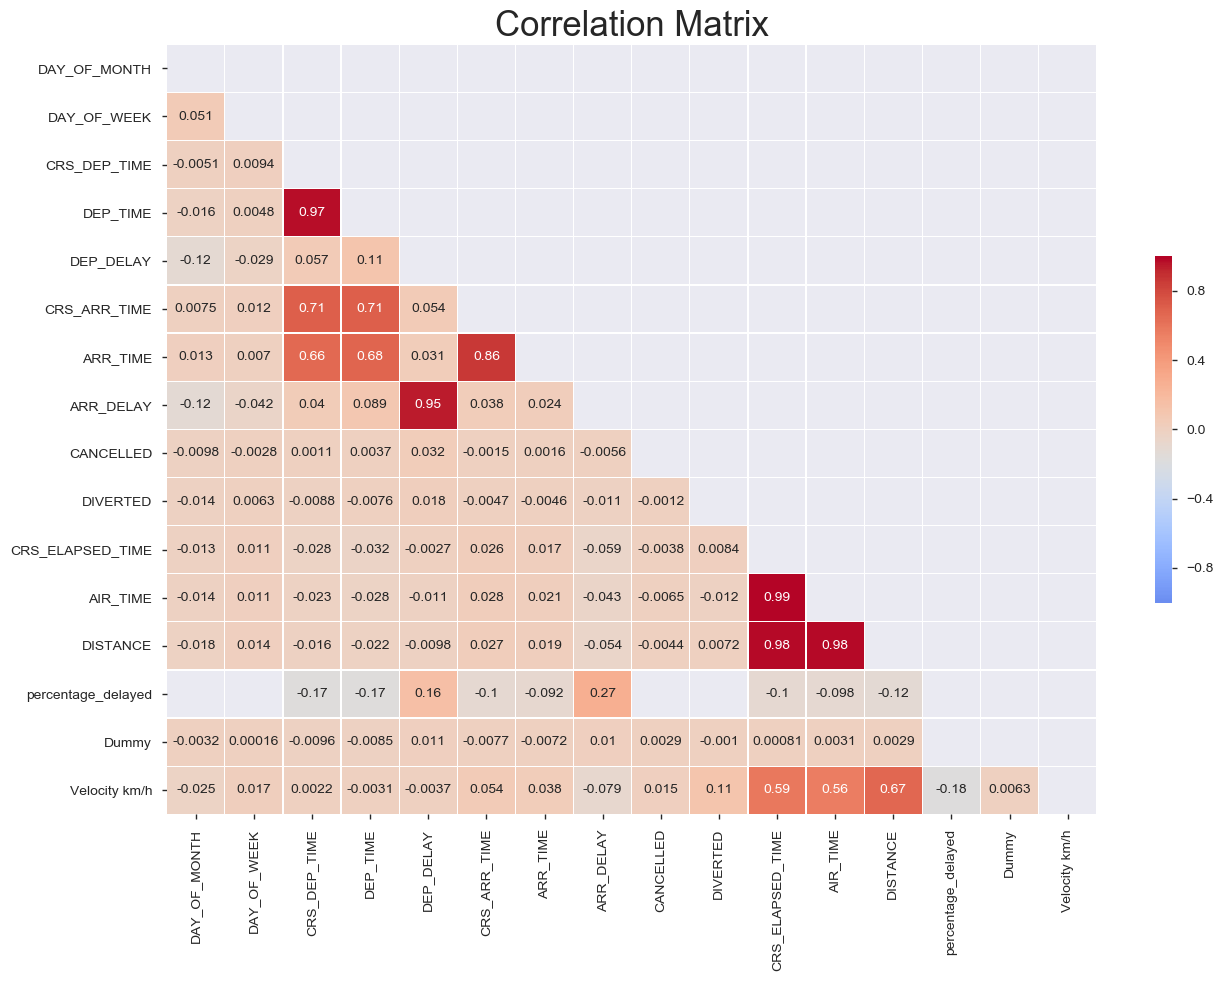

In [124]:
#We defined the matrix differently, just to make sure the numbers appeared correctly. 
#Instead of having square=True, we defined the figsize, and made our matrix to fit the size that we wanted.

#Color
cmap="coolwarm" #other color map : cmap="YlGnBu"

#figsize
plt.figure(figsize=(15,10))

#Correlation Matrix process:
corr = Matrix.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

plt.title('Correlation Matrix', y=1.0, size=25)
sns.heatmap(corr, mask = mask, linewidths=0.2,vmax=1.0, vmin=-1.0, 
            cmap=cmap, linecolor='white', annot=True, center=-0.18, cbar_kws={"shrink": .45})

---
# Regression
- Using the variables selected above, train a linear regression model to predict the number of minutes a flight is going to be delayed.

In [125]:
flight_actualized = flight_actualized.dropna()

In [129]:
#The group installed all the packages needed for this library, however sometimes a bug occured.
#Nevertheless we included in our report the outcome of this table
import statsmodels.api as sm
import statsmodels.formula.api as smf

# here we have 5 variables for multiple regression.
X = flight_actualized[["Velocity km/h","Dummy", "DISTANCE", "DAY_OF_MONTH", "DEP_DELAY"]] 

#Dependent Variable
Y = flight_actualized['ARR_DELAY']

# Fit regression model 
results = sm.OLS(Y, X).fit()

# Inspect the results
print(results.summary())

TypeError: issubclass() arg 2 must be a class or tuple of classes